In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("https://raw.githubusercontent.com/Leander-Antony/Bharat-Intern/main/SMS_classifier/spam.csv",encoding="ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [21]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


i checked through the data and found are continution of "v2"

In [23]:
# Concatenate the columns "v2", "Unnamed: 2", "Unnamed: 3", and "Unnamed: 4" into a single column
df['message'] = df['v2'] + df['Unnamed: 2'].fillna('') + df['Unnamed: 3'].fillna('') + df['Unnamed: 4'].fillna('')

# Drop the unnecessary columns
df.drop(['v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

#renaming the target variable
df = df.rename(columns={'v1': 'label'})

# Now your DataFrame will have the concatenated "message" column
print(df.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


ham     4825
spam     747
Name: label, dtype: int64


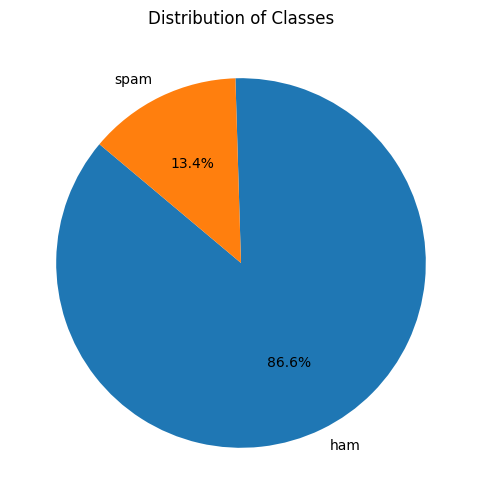

In [25]:
# Distribution of Classes
class_distribution = df['label'].value_counts()
print(class_distribution)

# Visualizing distribution of classes
plt.figure(figsize=(6, 6))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Classes')
plt.show()

In [26]:
# Nature of Messages
# Message Length Distribution
message_lengths = df['message'].apply(len)
print(message_lengths.describe())

count    5572.000000
mean       80.680007
std        59.992919
min         2.000000
25%        36.000000
50%        62.000000
75%       123.000000
max       910.000000
Name: message, dtype: float64


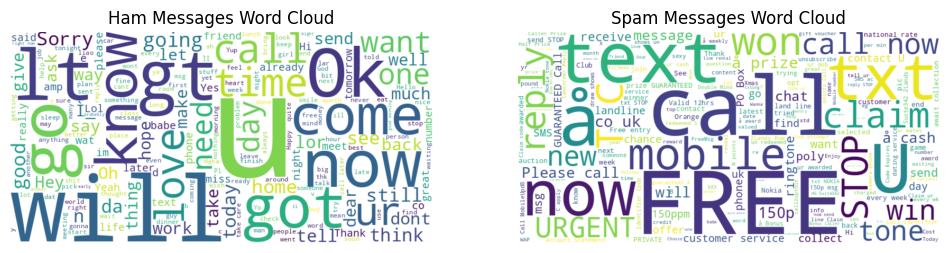

In [27]:
from wordcloud import WordCloud

# Word Cloud for Ham and Spam Messages
ham_messages = ' '.join(df[df['label'] == 'ham']['message'])
spam_messages = ' '.join(df[df['label'] == 'spam']['message'])

# Generate word clouds
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_messages)
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_messages)

# Plot word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Messages Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Messages Word Cloud')
plt.axis('off')

plt.show()


In [28]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Tokenization, Lowercasing, Removing Punctuation and Stopwords
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Lowercase all words
    tokens = [word.lower() for word in tokens]

    # Remove punctuation and special characters
    table = str.maketrans('', '', string.punctuation)
    stripped = [word.translate(table) for word in tokens]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in stripped if word not in stop_words]

    return ' '.join(words)

# Example SMS messages
sms_messages = df['message']

# Preprocess each message
preprocessed_messages = [preprocess_text(msg) for msg in sms_messages]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer to your text data and transform it into TF-IDF vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(df['message'])

In [30]:
X = tfidf_matrix
y = df['label']

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score, KFold

In [33]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20,50],
            'kernel': ['rbf','linear']
        }
    },

    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    }


}